## Dimensionality using PCA : Shuwel Ahmed Laskar


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'PCA_practice_dataset.csv')
df = pd.DataFrame(data)
df

,-3.125000000000000000e-02,2.363639999999999908e-01,2.380950000000000011e-01,-9.090910000000000657e-02,0.000000000000000000e+00,3.818179999999999907e-01,3.263159999999999950e-01,-1.562500000000000000e-02,-1.250000000000000000e-01,5.533979999999999455e-01,...,5.769229999999999636e-01,4.712640000000000162e-01,-3.333330000000000320e-02,-4.615380000000000177e-02,5.247519999999999962e-01,4.105260000000000020e-01,-1.562500000000000000e-02.2,-1.875000000000000000e-01.1,4.951459999999999750e-01,5.157890000000000530e-01
0,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
1,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
2,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
3,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
4,-0.031250,0.381818,0.357143,-0.024793,0.000000,0.381818,0.431579,-0.015625,-0.031250,0.553398,...,0.480769,0.471264,-0.033333,-0.046154,0.623762,0.515789,0.046875,0.062500,0.592233,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8037,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8038,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8039,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [3]:
X = df.to_numpy()
X.shape

(8041, 35)

# Applying PCA

In [4]:
from sklearn.decomposition  import PCA 

In [5]:
pca = PCA()
X = pca.fit_transform(X)
#Summing of all the eigen values for the corresponding eigen vectors
C_V = np.cumsum(pca.explained_variance_ratio_)*100
#We declared a list of desired thresholds
thresholds = [i for i in range (90,97+1,1)]

#We make a list of the components required to retain the varience as mentioned in our required list
components = [np.argmax(C_V>threshold)for threshold in thresholds]
for component,threshold in zip(components,thresholds):
    print("Components required for {}% threshold are{}:".format(threshold,component))

Components required for 90% threshold are2:
Components required for 91% threshold are2:
Components required for 92% threshold are3:
Components required for 93% threshold are3:
Components required for 94% threshold are4:
Components required for 95% threshold are4:
Components required for 96% threshold are5:
Components required for 97% threshold are6:


In [7]:
import matplotlib.pyplot as plt

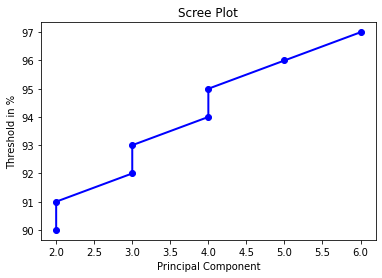

In [14]:
#scree plot
plt.plot(components,range(90,97+1,1),'bo-',linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()

###  Dimensionality reduction

In [17]:
X_orig = X

for component,var in zip(components,thresholds):
    pca = PCA(n_components=component)
    X_transformed = pca.fit_transform(X_orig)
    print('Dimensionality reduction to retain {}% thresholds'.format(var))
    print('After dimensionality reduction, new shape of the dataset is : ',X_transformed.shape)
    print('\n')

Dimensionality reduction to retain 90% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 2)


Dimensionality reduction to retain 91% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 2)


Dimensionality reduction to retain 92% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 3)


Dimensionality reduction to retain 93% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 3)


Dimensionality reduction to retain 94% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 4)


Dimensionality reduction to retain 95% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 4)


Dimensionality reduction to retain 96% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 5)


Dimensionality reduction to retain 97% thresholds
After dimensionality reduction, new shape of the dataset is :  (8041, 6)


